# Basic Raster Styling and Analysis

## Introduction

[`rioxarray`](https://corteva.github.io/rioxarray/stable/) and [`xarray-spatial`](https://xarray-spatial.readthedocs.io/en/stable/) extensions provide core functionality for working with geospatial rasters using XArray. In this tutorial, we will use these to read, analyze and reclassify population rasters.

## Overview of the Task

We will use the [Gridded Population of the World (GPW) v4](https://sedac.ciesin.columbia.edu/data/collection/gpw-v4) dataset from Columbia University. Specifically, the [Population Count](https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-count-rev11/data-download) for the entire globe at 2.5 Minute (~5Km) resolution in GeoTiFF format and for the year 2010 and 2020. Using these we will create a thematic map of the global population change between year 2010 and 2020.

**Input Layers**:
*   `gpw-v4-population-count-rev11_YYYY_2pt5_min_tif.zip`: Zipped Raster files having population data.

**Output**:
*   `change_class.tif` : A GeoTIFF file of categorized population change.

**Data Credit**:
*   Center for International Earth Science Information Network - CIESIN - Columbia University. 2018. Gridded Population of the World, Version 4 (GPWv4): Population Count, Revision 11. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/H4JW8BX5. Accessed 27 JUNE 2019

## Setup and Data Download
The following blocks of code will install the required packages and download the datasets to your Colab environment.


In [19]:
%%capture
if 'google.colab' in str(get_ipython()):
    !pip install rioxarray xarray-spatial

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import rioxarray as rxr
import xrspatial
import zipfile

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [21]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [22]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

data_url = 'https://github.com/spatialthoughts/geopython-tutorials/releases/download/data/'

gpw_pop_2010 = 'gpw-v4-population-count-rev11_2010_2pt5_min_tif.zip'
gpw_pop_2020 = 'gpw-v4-population-count-rev11_2020_2pt5_min_tif.zip'

download(data_url + gpw_pop_2010)
download(data_url + gpw_pop_2020)

Downloaded data/gpw-v4-population-count-rev11_2010_2pt5_min_tif.zip
Downloaded data/gpw-v4-population-count-rev11_2020_2pt5_min_tif.zip


## Procedure

Read the gridded population of the World files using the `rioxarray` by using [open_raster](https://docs.xarray.dev/en/stable/generated/xarray.open_rasterio.html) function. We can read the GeoTIFF file directly from the zip archive without uncompressing it first by creating a URI with the `zip://` prefix.

In [23]:
gpw_pop_2010_path = os.path.join(data_folder, gpw_pop_2010)

with zipfile.ZipFile(gpw_pop_2010_path) as f:
  files = f.namelist()
  for file in files:
    if os.path.splitext(file)[1] == '.tif':
      tif_file = file

gpw_pop_2010_uri = 'zip://{}!{}'.format(gpw_pop_2010_path, tif_file)
pop2010 = rxr.open_rasterio(gpw_pop_2010_uri, mask_and_scale=True)

In [24]:
gpw_pop_2020_path = os.path.join(data_folder, gpw_pop_2020)

with zipfile.ZipFile(gpw_pop_2020_path) as f:
  files = f.namelist()
  for file in files:
    if os.path.splitext(file)[1] == '.tif':
      tif_file = file

gpw_pop_2020_uri = 'zip://{}!{}'.format(gpw_pop_2020_path, tif_file)
pop2020 = rxr.open_rasterio(gpw_pop_2020_uri, mask_and_scale=True)

Now we will take the difference of the population

In [25]:
change = pop2020 - pop2010

In [14]:
import zipfile

zip_path = "state_boundary.zip"
print("Exists:", os.path.exists(zip_path))
print("Is zip:", zipfile.is_zipfile(zip_path))


Exists: True
Is zip: True


In [12]:
shp_files = []
for root, dirs, files in os.walk("state_boundary_unzipped"):
    for file in files:
        if file.endswith('.shp'):
            full_path = os.path.join(root, file)
            print(full_path)
            shp_files.append(full_path)
# Now, shp_files is a list of all .shp file paths


state_boundary_unzipped/state_boundary/STATE_BOUNDARY.shp


Found SHP: state_boundary_unzipped/state_boundary/STATE_BOUNDARY.shp
Shapefile CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",24],PARAMETER["central_meridian",80],PARAMETER["standard_parallel_1",12.472944],PARAMETER["standard_parallel_2",35.172806],PARAMETER["false_easting",4000000],PARAMETER["false_northing",4000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Raster CRS: EPSG:4326
Reprojected shapefile to match raster CRS.


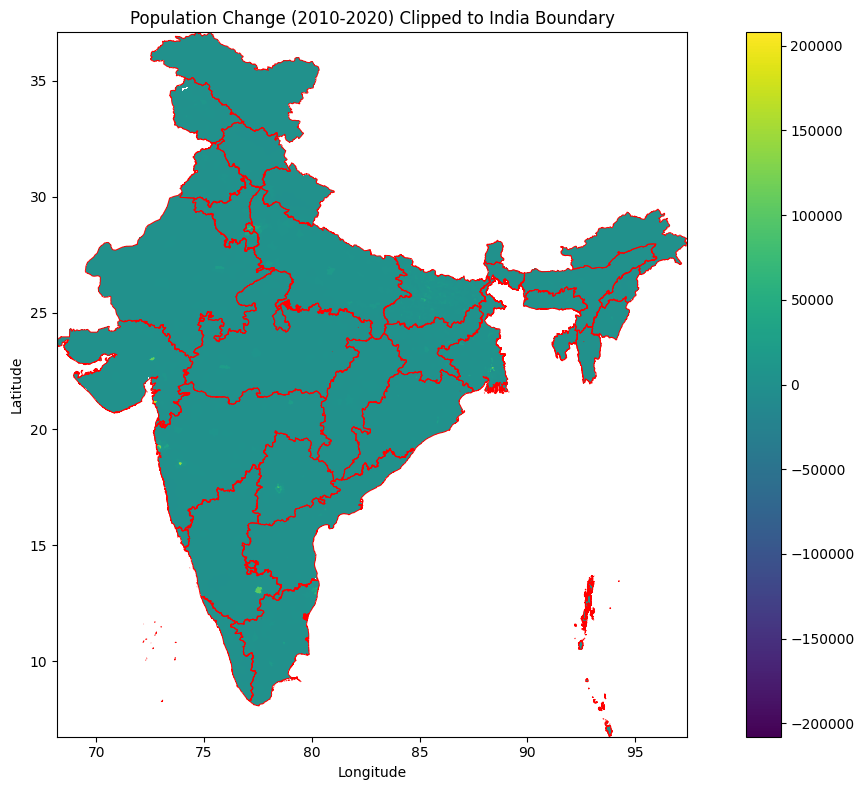

Clipped raster saved at: output/pop_change_2010_2020_clipped.tif


In [28]:
import os
import zipfile
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

# --- 1. Find all .shp files in your unzipped folder
shp_files = []
for root, dirs, files in os.walk("state_boundary_unzipped"):
    for file in files:
        if file.endswith('.shp'):
            full_path = os.path.join(root, file)
            print("Found SHP:", full_path)
            shp_files.append(full_path)

if not shp_files:
    raise FileNotFoundError("No .shp file found in 'state_boundary_unzipped' folder!")

shapefile_path = shp_files[0]  # Use the first found shapefile

# --- 2. Read the shapefile
gdf = gpd.read_file(shapefile_path)
print("Shapefile CRS:", gdf.crs)

# --- 3. Ensure raster and shapefile CRS match
print("Raster CRS:", change.rio.crs)
if gdf.crs != change.rio.crs:
    gdf = gdf.to_crs(change.rio.crs)
    print("Reprojected shapefile to match raster CRS.")

# --- 4. Clip raster with India boundary
clipped = change.rio.clip(gdf.geometry, gdf.crs, drop=True)



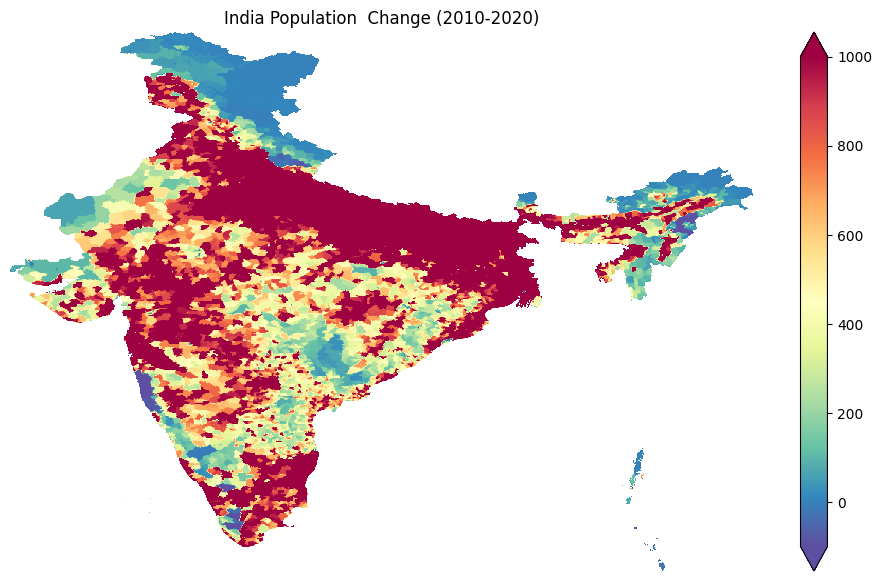

In [56]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)

clipped.sel(band=1).plot.imshow(
    ax=ax,
    vmin=-100, vmax=1000, center=0,
    add_colorbar=True, cmap='Spectral_r'
)
ax.set_title('India Population  Change (2010-2020)')
ax.set_axis_off()

plt.show()


`change` is a 3D array containing 1-band with pixel values with the population count different between the 2 years. We select the `band1` and visualize it using XArray's [`imshow()`](https://docs.xarray.dev/en/stable/generated/xarray.plot.imshow.html) method.

The values range from negative (reduction in population) to positive (increate in population). Since we are plotting diverging values, we can use a **Spectral** color ramp. We can anchor the visualization to a min/max range using `vmin` and `vmax` values. It is important to specify a `center` value so that the color ramp is centered at the specified value.

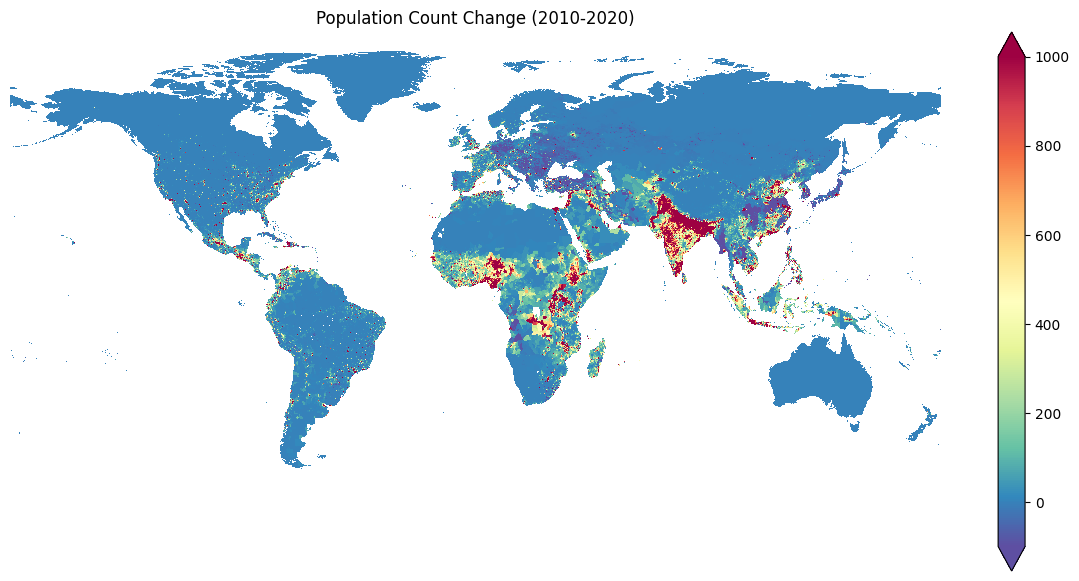

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,7)

change.sel(band=1).plot.imshow(
    ax=ax, vmin=-100, vmax=1000, center=0,
    add_colorbar=True, cmap='Spectral_r')
ax.set_title('Population Count Change (2010-2020)')
ax.set_axis_off()

plt.show()

This is a good visualization, but not easy to interpret. Let’s create a better map with 4 discrete categories:

* **Negative**: Negative Cange upto -100.
* **Neutral**: Insignificant Negative or Positive Change between -100 to +100
* **Growth**: Small Positive Change between 100 to 1000.
* **High Growth**: Large Positive Change greater than 1000.

We use XArray Spatial's [`reclassify()`](https://xarray-spatial.readthedocs.io/en/stable/reference/_autosummary/xrspatial.classify.reclassify.html) method to perform the reclassification from continuous values to 4 discrete classes.



In [37]:
import xrspatial.classify as xrc

class_bins = [-100, 100, 1000, np.inf]
class_values = [1, 2, 3, 4]

# Apply reclassification on the clipped raster (India)
change_class = xrc.reclassify(
    clipped.sel(band=1),
    bins=class_bins,
    new_values=class_values
)


The result is a 2D array of reclassified values. We can visualize it the same way as before.

Since we have discrete pixel values, we can assign a specific color to each class using the `levels` parameter. The `levels` list defines the boundary of each interval and the `colors` list defines the colors assigned to each interval.

* Interval 1: Values between 1 and 2 (Decline)
* Interval 2: Values between 2 and 3 (Neutral)
* Interval 3: Values between 3 and 4 (Growth)
* Interval 4: Values between 4 and 5 (High Growth)


The `imshow` method supports only a colorbar legend which is not appropriate for a discrete classified raster such as ours. We use Matplotlib's [`Patch()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html) method to create a patch with appropriate labels and colors as described in Matplotlib's [Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

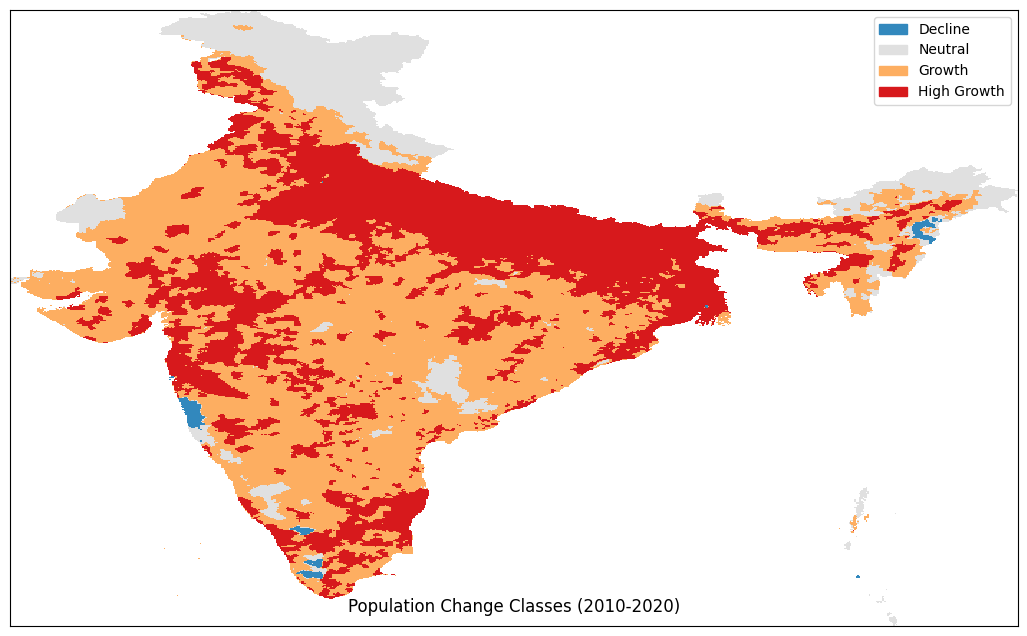

In [51]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(13,8)

levels = np.linspace(
    min(class_values), max(class_values) + 1, len(class_values) + 1)

colors = ['#3288bd', '#e0e0e0', '#fdae61', '#d7191c']
labels = ['Decline', 'Neutral', 'Growth', 'High Growth']

change_class.plot.imshow(
    ax=ax,
    add_colorbar=False,
    levels=levels,
    vmin=1,
    colors=colors)


patches =[mpatches.Patch(color=colors[i], label=labels[i]) for i in range(4)]
ax.legend(handles=patches)
ax.set_title('Population Change Classes (2010-2020)', y=0.01)

# Set axis labels off
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Last step is to save the results to disk as a GeoTiff file.

Support for third party widgets will remain active for the duration of the session. To disable support:

----

If you want to give feedback or share your experience with this tutorial, please comment below. (requires GitHub account)


<script src='https://utteranc.es/client.js'
    repo='spatialthoughts/geopython-tutorials'
    issue-term='pathname'
    theme='github-light'
    crossorigin='anonymous'
    async>
</script>